In [1]:
import os
import glob
import pandas as pd
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

,ID,Description,status
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,no change
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,changed 4/27
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,no change
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,no change
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,changed 4/27
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,no change
6,CAM02037CCTV43.jpg,Atherton and Vairo,no change
7,CAM02038CCTV44.jpg,Atherton and North Hills,no change
8,CAM02039CCTV45.jpg,Atherton and Park,no change
9,CAM02040CCTV46.jpg,Atherton and W.College,changed 5/2


In [2]:
# Loading all camera data...
xdf0 = pd.read_csv("/home/ubuntu/nitelite/fp803.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_UTC']) - pd.Timedelta(hours=4)

xdf0['datetime_EST'] = pd.to_datetime(xdf0['datetime_EST'])
xdf0.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
161,2020-07-27 05:00:01,'/home/ubuntu/cams18/CAM02003CCTV4/20200727/20...,CAM02003CCTV4.jpg',0,2020-07-27 01:00:01
1439,2020-07-27 05:00:04,'/home/ubuntu/cams18/parkArboretum/20200727/20...,parkArboretum.jpg',0,2020-07-27 01:00:04
650,2020-07-27 05:00:06,'/home/ubuntu/cams18/CAM02020CCTV24/20200727/2...,CAM02020CCTV24.jpg',0,2020-07-27 01:00:06
83,2020-07-27 05:00:08,'/home/ubuntu/cams18/CAM02002CCTV3/20200727/20...,CAM02002CCTV3.jpg',0,2020-07-27 01:00:08
396,2020-07-27 05:00:10,'/home/ubuntu/cams18/CAM02007CCTV13/20200727/2...,CAM02007CCTV13.jpg',0,2020-07-27 01:00:10
...,...,...,...,...,...
254745,2020-08-03 15:34:45,'/home/ubuntu/cams18/CAM02046CCTV52/20200803/2...,CAM02046CCTV52.jpg',0,2020-08-03 11:34:45
254336,2020-08-03 15:34:47,'/home/ubuntu/cams18/CAM02009CCTV7/20200803/20...,CAM02009CCTV7.jpg',0,2020-08-03 11:34:47
254081,2020-08-03 15:34:49,'/home/ubuntu/cams18/CAM02001CCTV2/20200803/20...,CAM02001CCTV2.jpg',0,2020-08-03 11:34:49
254373,2020-08-03 15:34:51,'/home/ubuntu/cams18/CAM02010CCTV11/20200803/2...,CAM02010CCTV11.jpg',0,2020-08-03 11:34:51


In [3]:
# Loading all camera data...
xdf7 = pd.read_csv("/home/ubuntu/nitelite/full_pedestrians_427-727.csv")

#dfcam['time'] =  pd.to_datetime(dfcam['time'])
#dfcam = dfcam.sort_values(by='time')

#dfcam = dfcam.rename(columns={"time": "datetime_UTC", "file": "image_file", "vehicle": "vehicle_count"})
xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_UTC']) - pd.Timedelta(hours=4)

xdf7['datetime_EST'] = pd.to_datetime(xdf7['datetime_EST'])
xdf7.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
1923329,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp.jpg,collegeTwp,0,2020-04-24 16:41:29
1922032,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
1922338,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
1922527,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
1922685,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
254696,2020-07-27 05:02:50,/home/ubuntu/camsc13/CAM02005CCTV9/20200727/20...,CAM02005CCTV9.jpg,0,2020-07-27 01:02:50
254701,2020-07-27 05:02:53,/home/ubuntu/camsc13/CAM02006CCTV10/20200727/2...,CAM02006CCTV10.jpg,0,2020-07-27 01:02:53
254726,2020-07-27 05:02:55,/home/ubuntu/camsc13/CAM02033CCTV38/20200727/2...,CAM02033CCTV38.jpg,0,2020-07-27 01:02:55
254753,2020-07-27 05:02:57,/home/ubuntu/camsc13/collegeTwp/20200727/20200...,collegeTwp.jpg,0,2020-07-27 01:02:57


In [4]:
xdf = pd.concat([xdf0,xdf7])

In [5]:
xdf.columns

Index(['datetime_UTC', 'image_path', 'camera_name', 'pedestrian_count',
       'datetime_EST'],
      dtype='object')

In [6]:
xdf.sort_values(by='datetime_EST')

,datetime_UTC,image_path,camera_name,pedestrian_count,datetime_EST
1923329,2020-04-24 20:41:29,/home/ubuntu/cams1/20200424_204129_collegeTwp.jpg,collegeTwp,0,2020-04-24 16:41:29
1922032,2020-04-24 20:41:32,/home/ubuntu/cams1/20200424_204132_CAM02028CCT...,CAM02028CCTV32,0,2020-04-24 16:41:32
1922338,2020-04-24 20:41:34,/home/ubuntu/cams1/20200424_204134_CAM02037CCT...,CAM02037CCTV43,0,2020-04-24 16:41:34
1922527,2020-04-24 20:41:36,/home/ubuntu/cams1/20200424_204136_CAM02038CCT...,CAM02038CCTV44,0,2020-04-24 16:41:36
1922685,2020-04-24 20:41:38,/home/ubuntu/cams1/20200424_204138_CAM02039CCT...,CAM02039CCTV45,0,2020-04-24 16:41:38
...,...,...,...,...,...
254745,2020-08-03 15:34:45,'/home/ubuntu/cams18/CAM02046CCTV52/20200803/2...,CAM02046CCTV52.jpg',0,2020-08-03 11:34:45
254336,2020-08-03 15:34:47,'/home/ubuntu/cams18/CAM02009CCTV7/20200803/20...,CAM02009CCTV7.jpg',0,2020-08-03 11:34:47
254081,2020-08-03 15:34:49,'/home/ubuntu/cams18/CAM02001CCTV2/20200803/20...,CAM02001CCTV2.jpg',0,2020-08-03 11:34:49
254373,2020-08-03 15:34:51,'/home/ubuntu/cams18/CAM02010CCTV11/20200803/2...,CAM02010CCTV11.jpg',0,2020-08-03 11:34:51


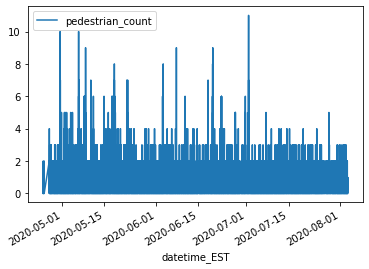

In [7]:
xdf.plot(x="datetime_EST",y='pedestrian_count')

In [8]:
xdf.to_csv(f"full_pedestrians_427-803.csv",index=False)

In [9]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')

In [10]:
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_count_sum')

In [11]:
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['pedestrian_count'].sum().reset_index(name='pedestrian_count_sum')

In [12]:
icdfcvc['image_count'] = icdf["image_count"]

In [13]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count_sum) / (float(row.image_count)/60.0))
    return(rv)   

In [14]:
icdfcvc['pedestrian_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

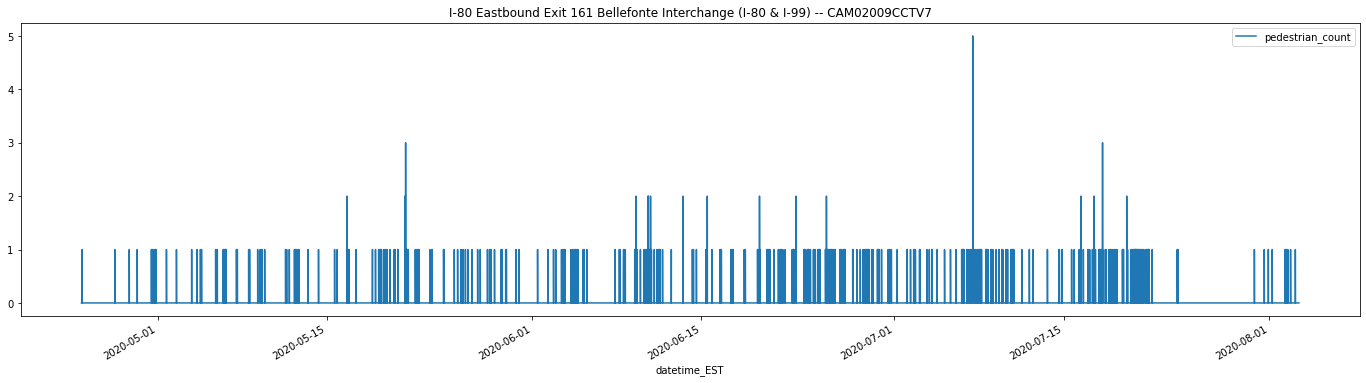

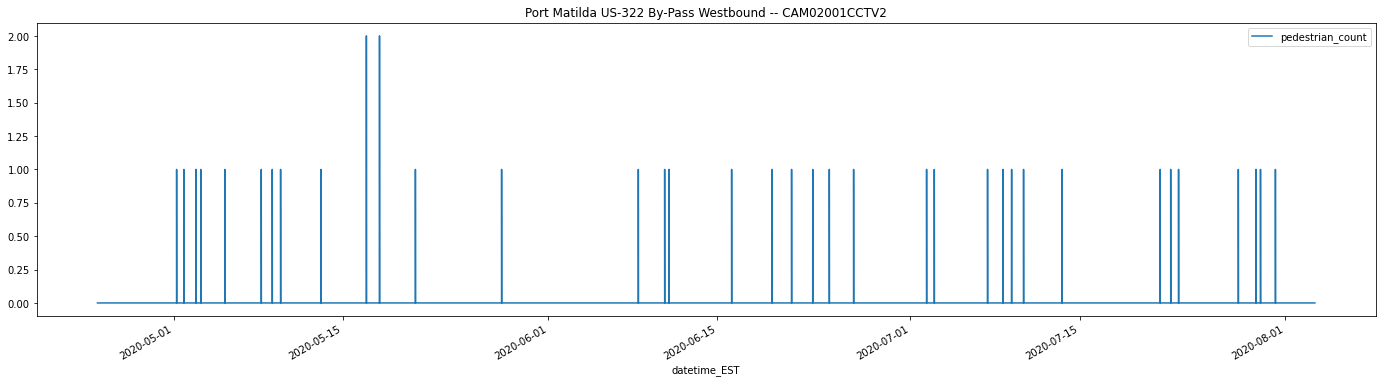

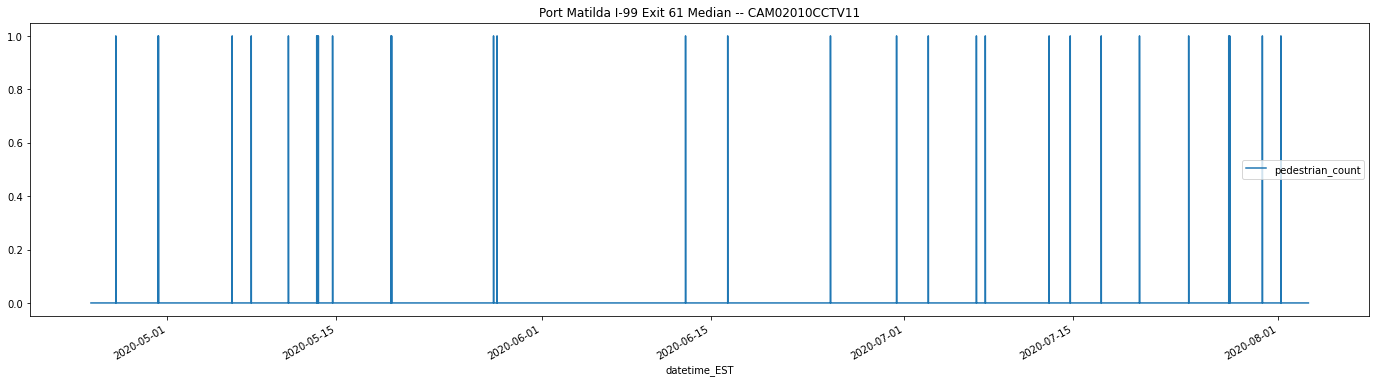

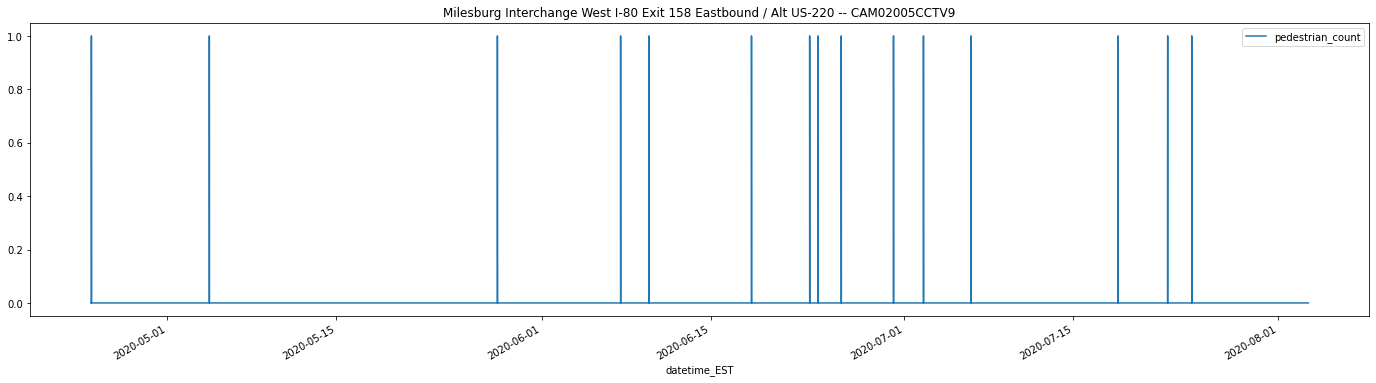

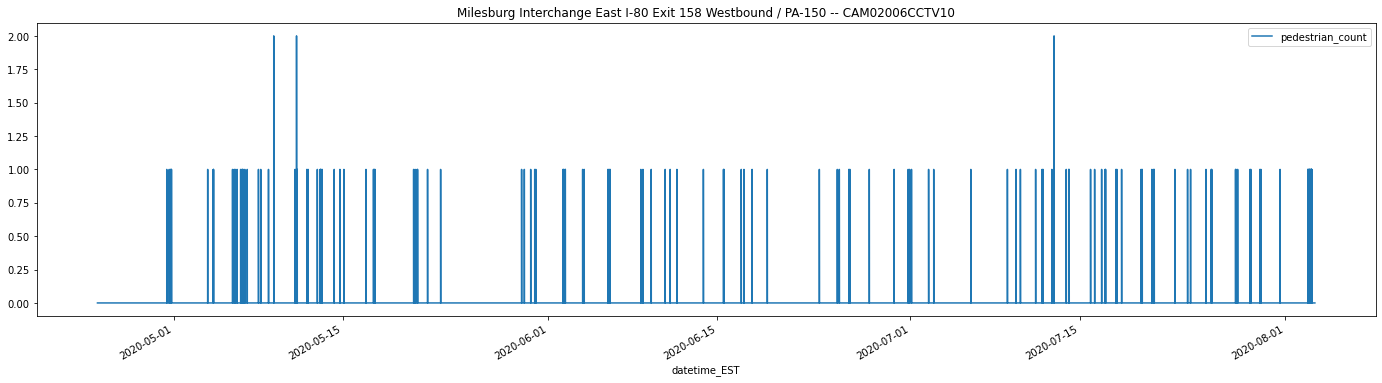

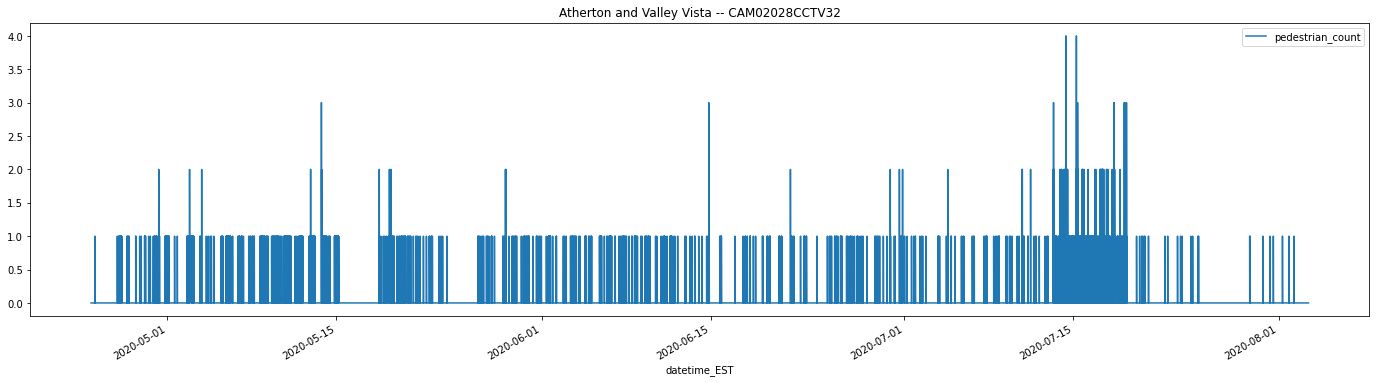

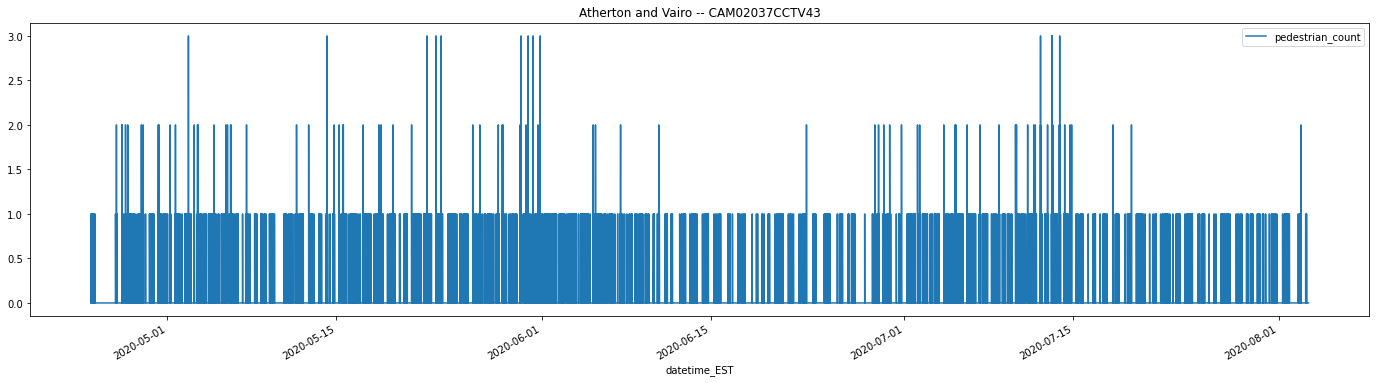

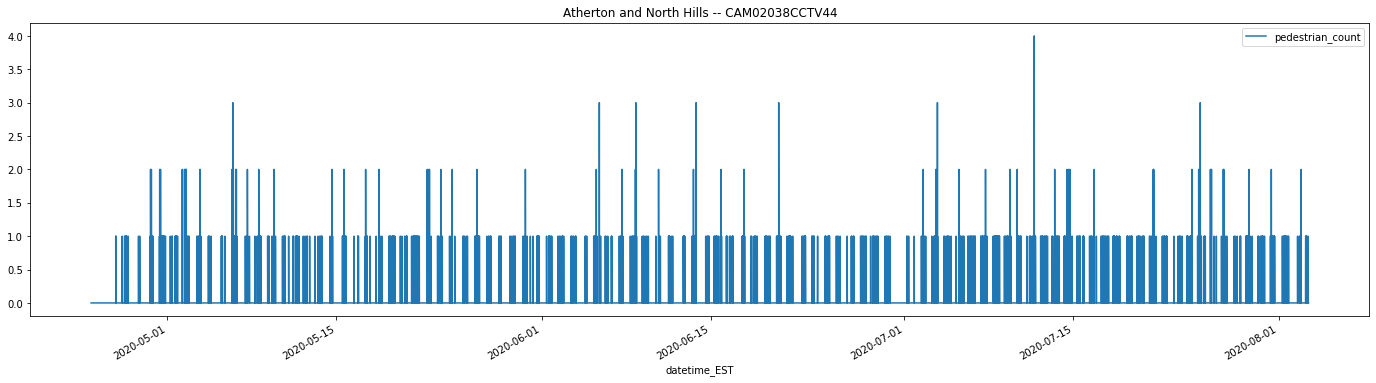

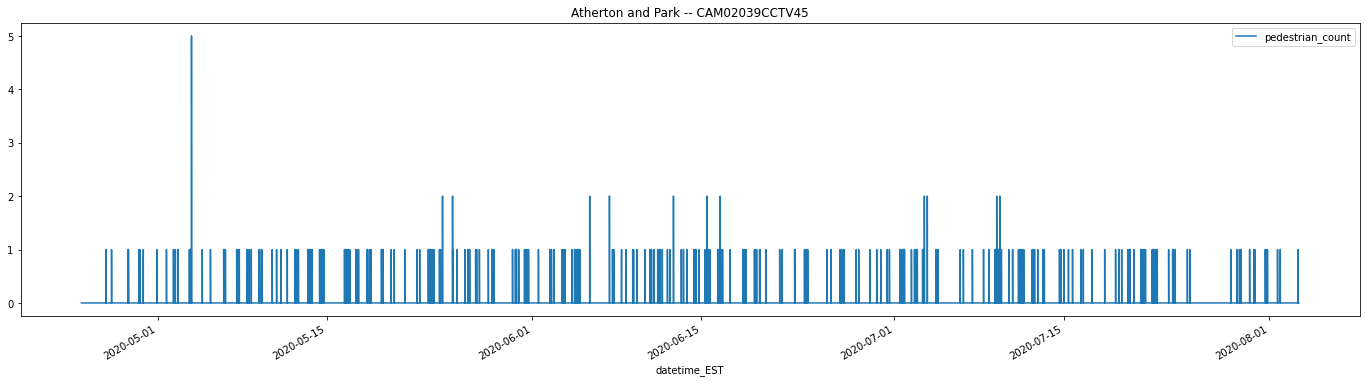

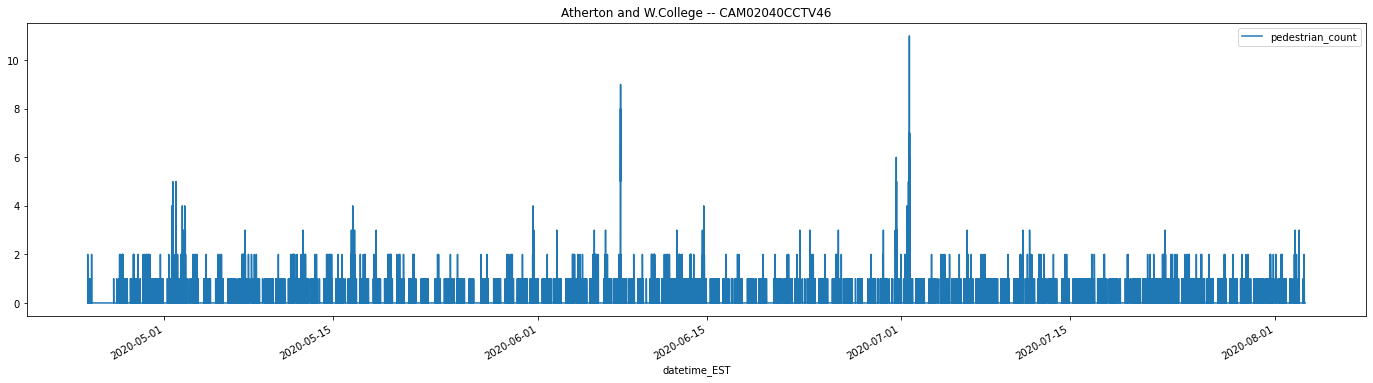

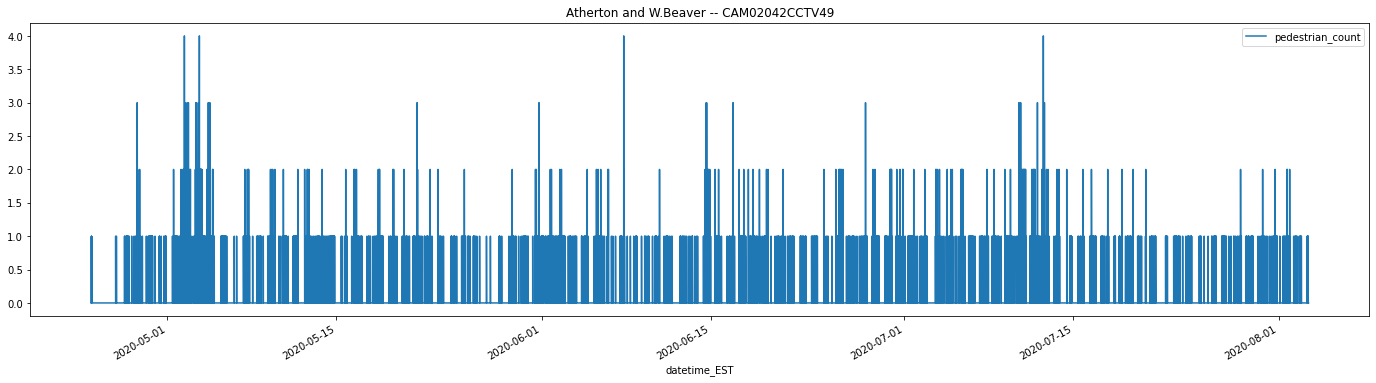

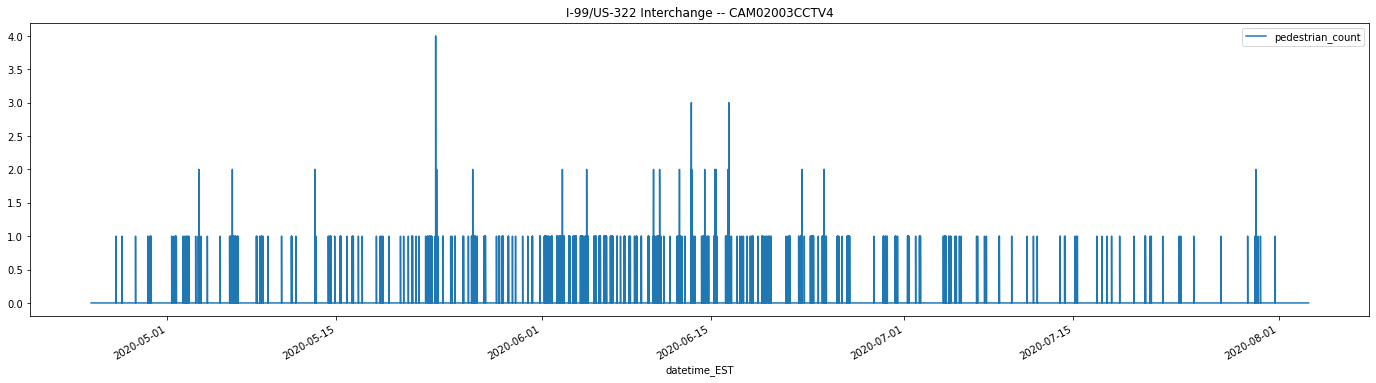

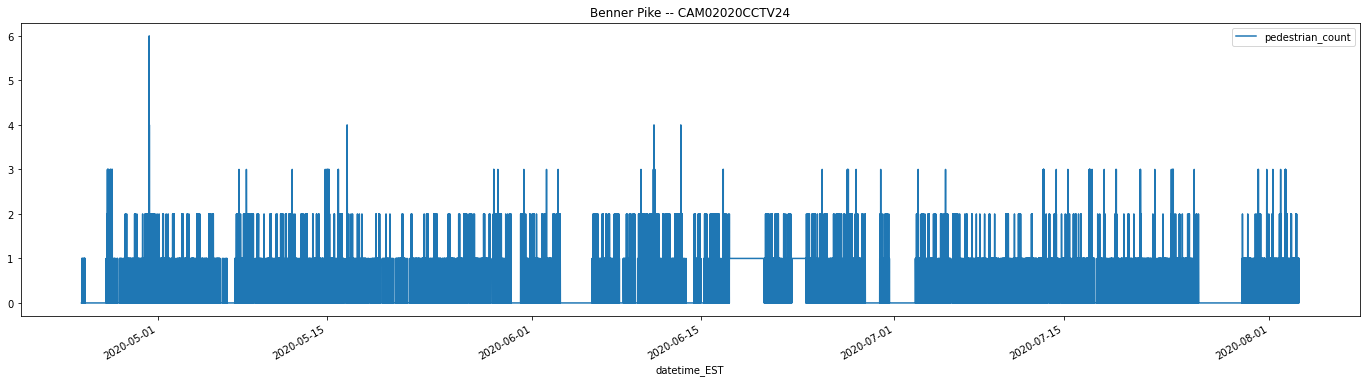

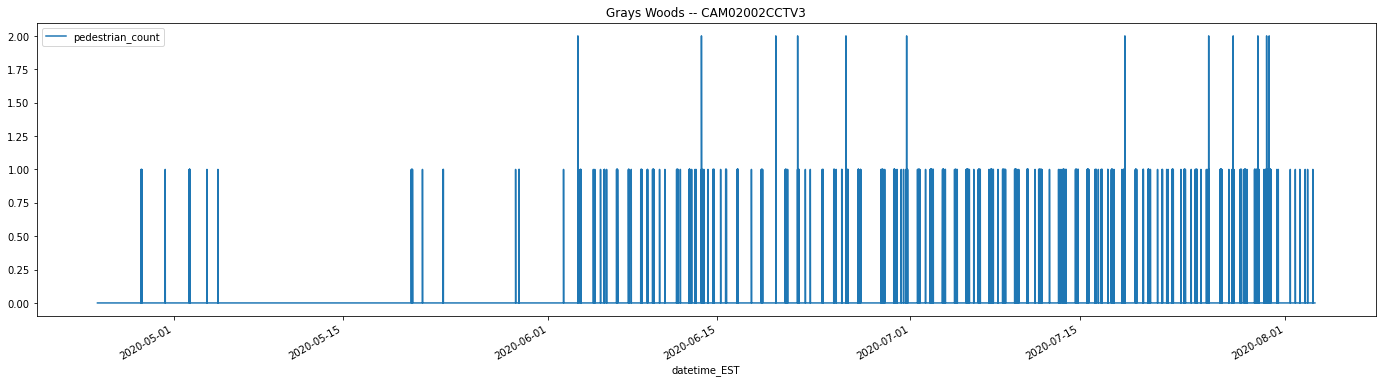

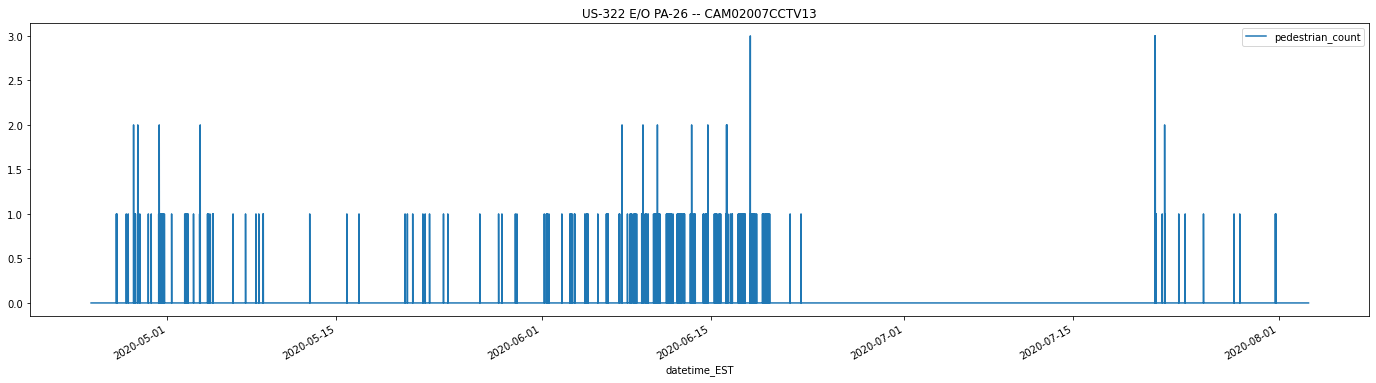

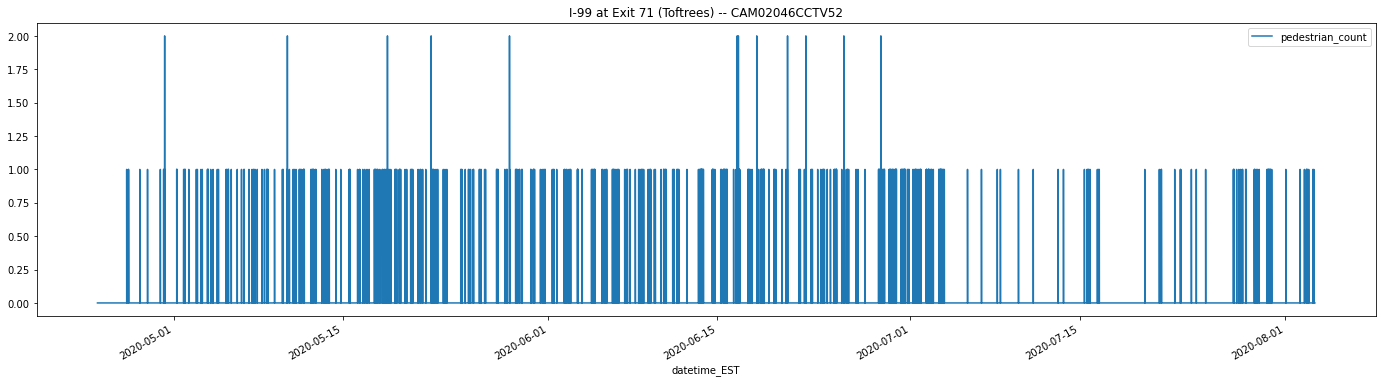

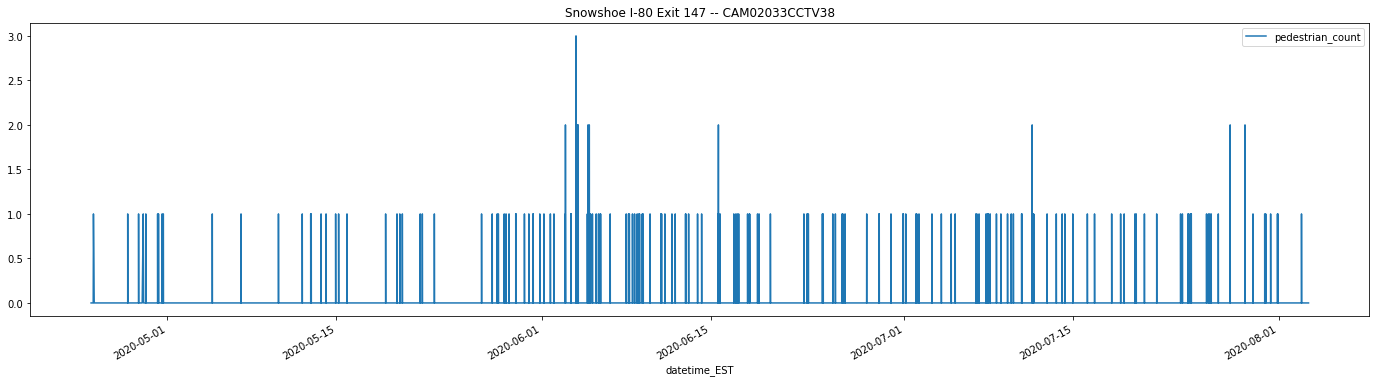

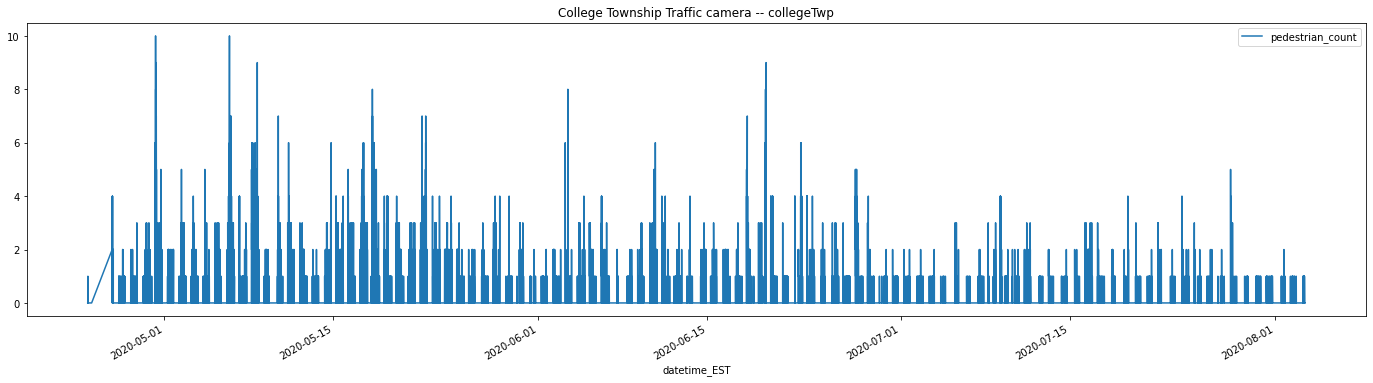

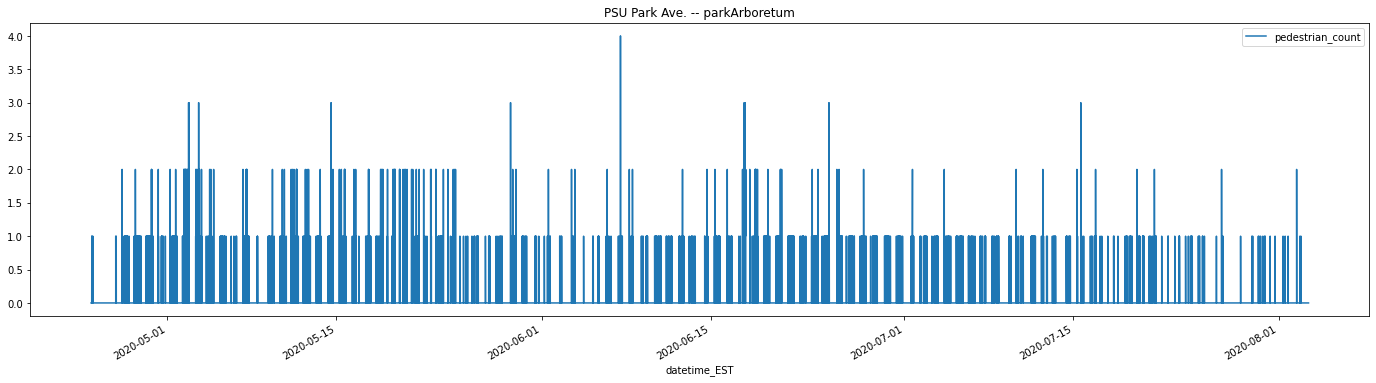

In [15]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = xdf[xdf['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

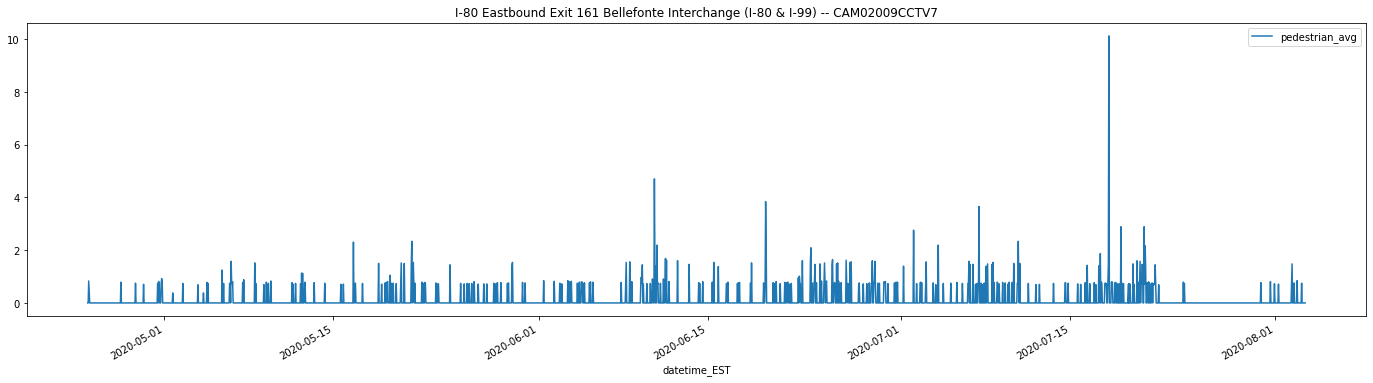

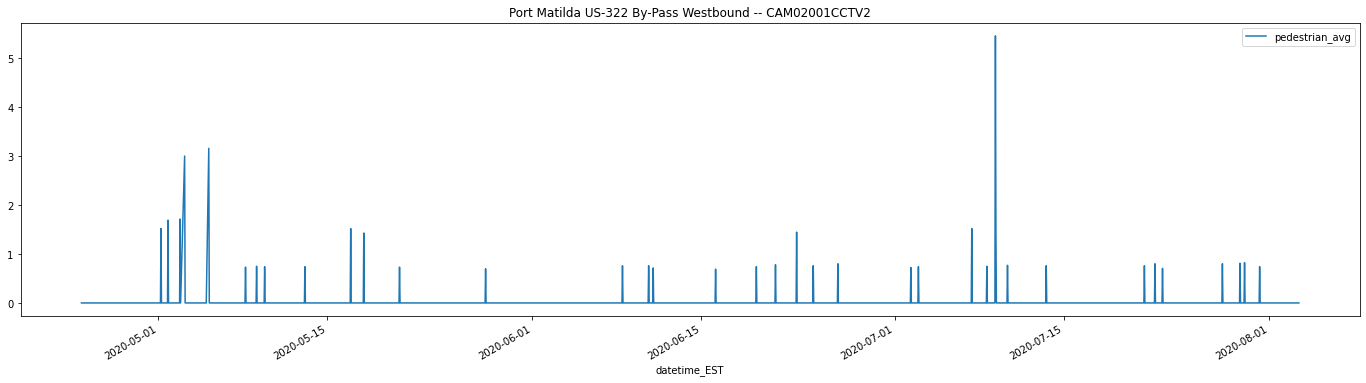

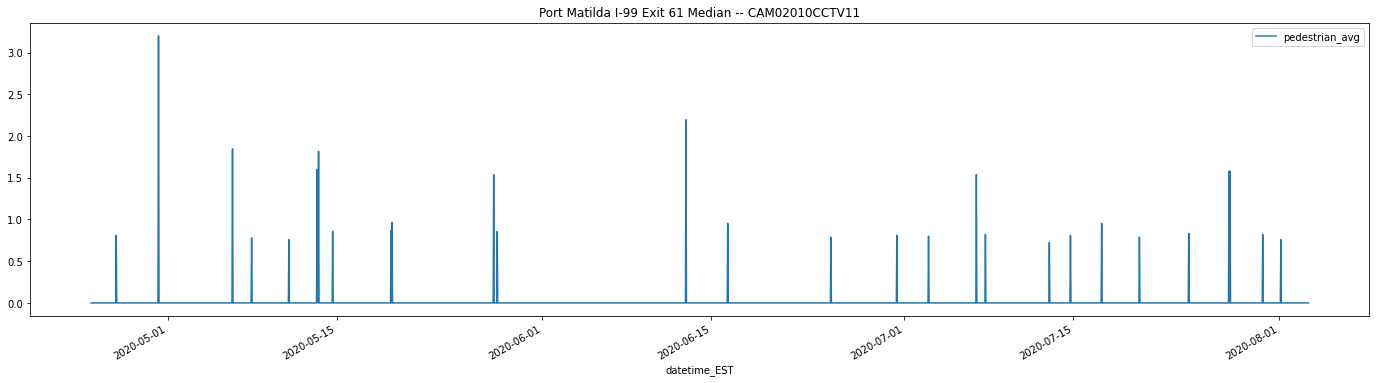

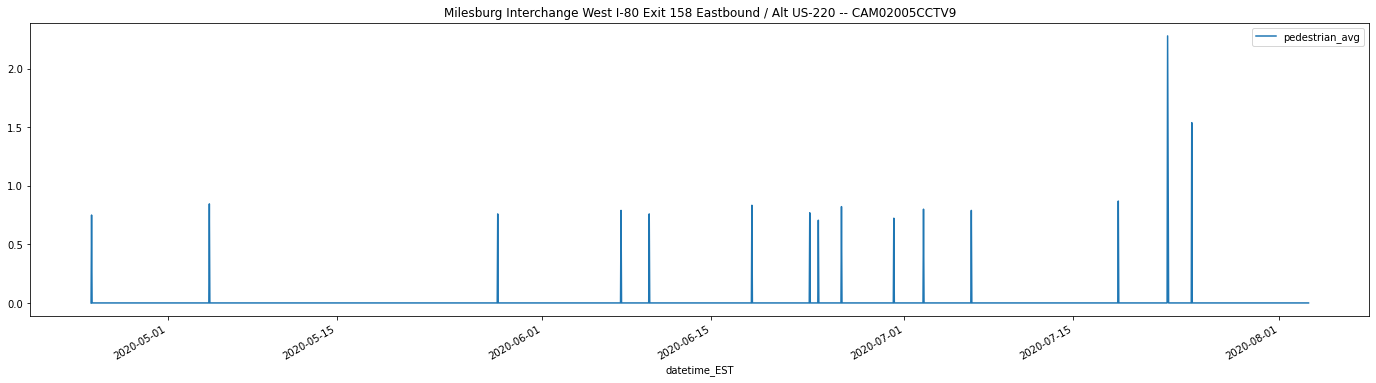

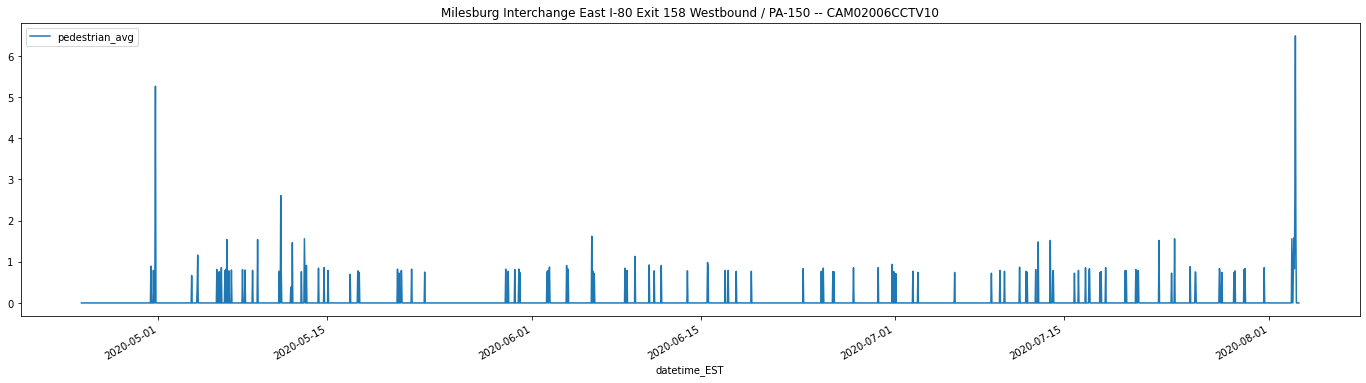

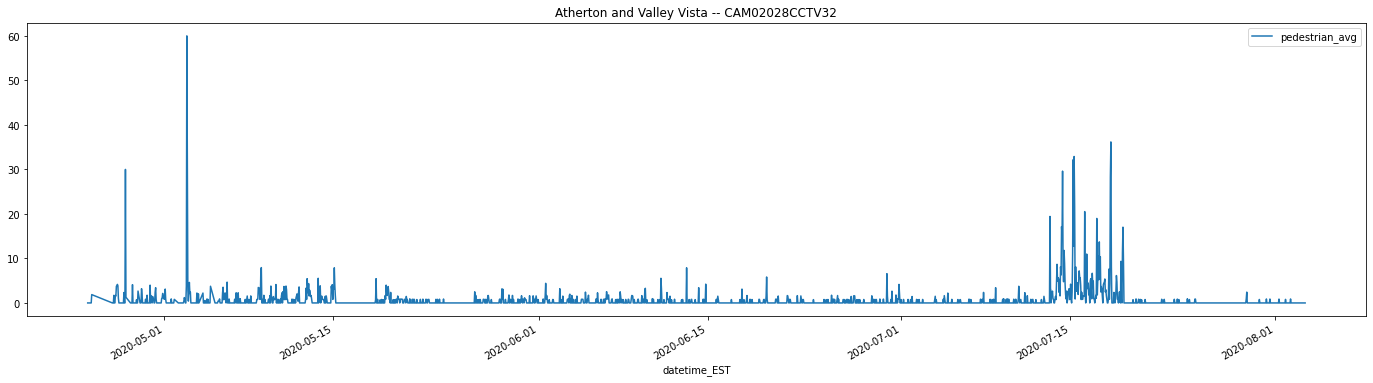

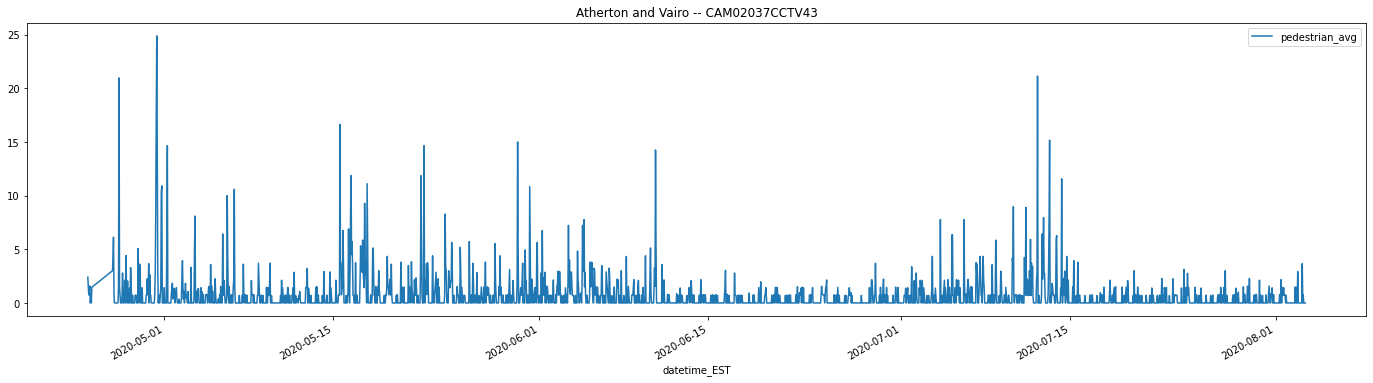

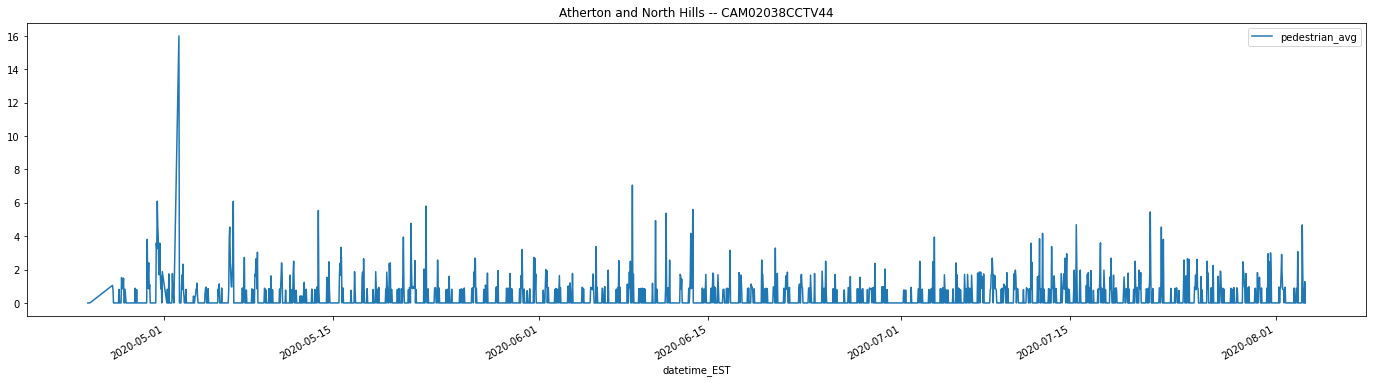

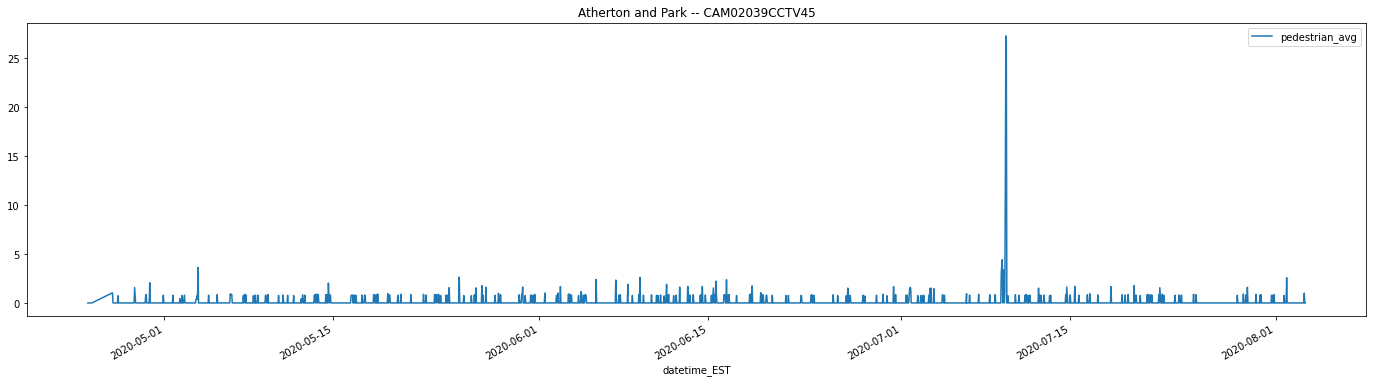

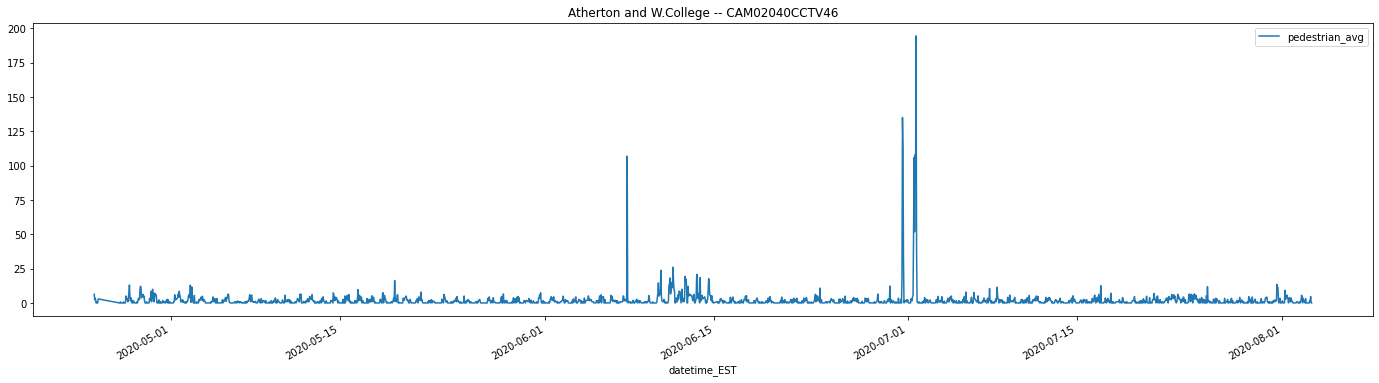

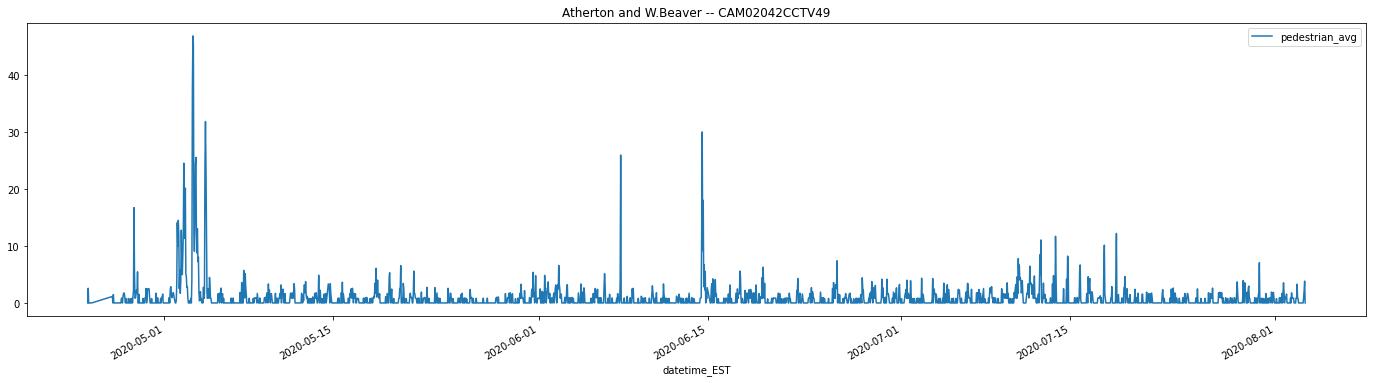

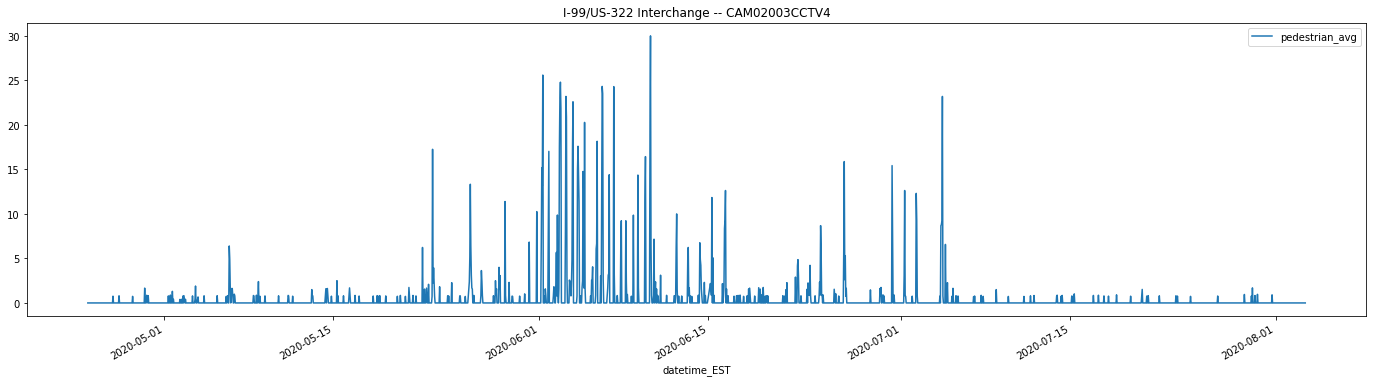

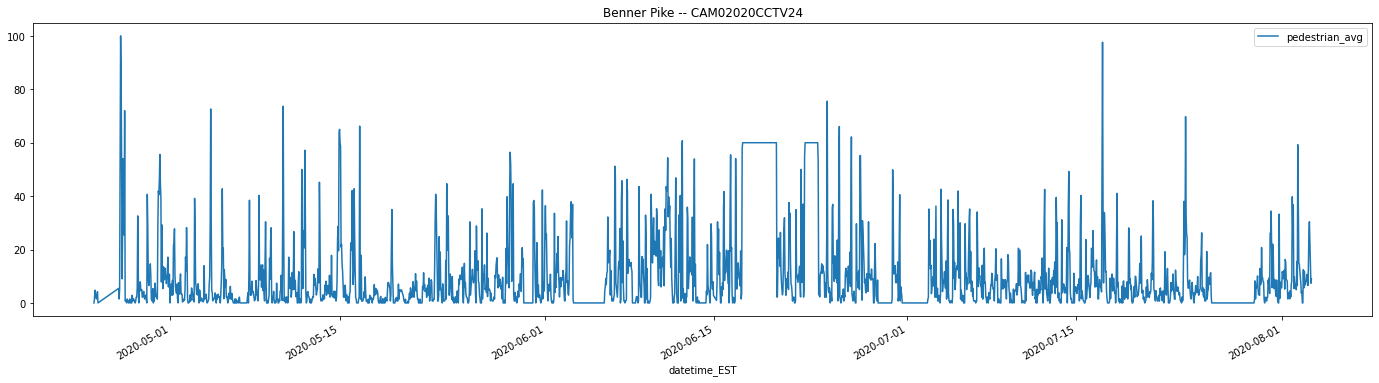

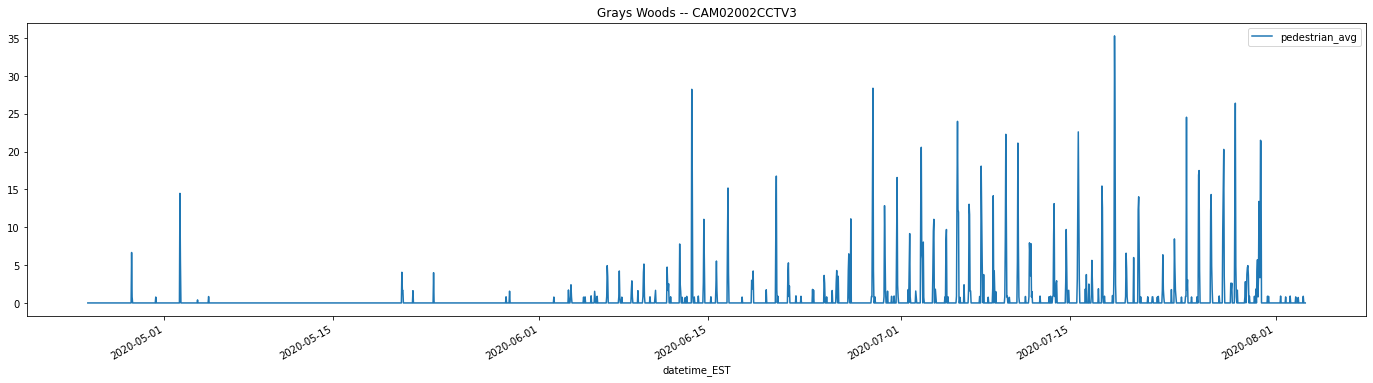

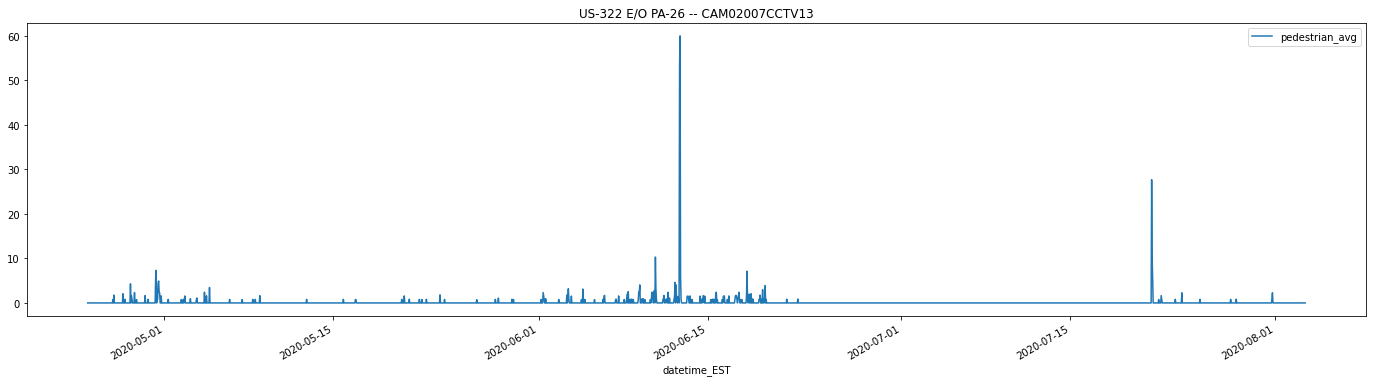

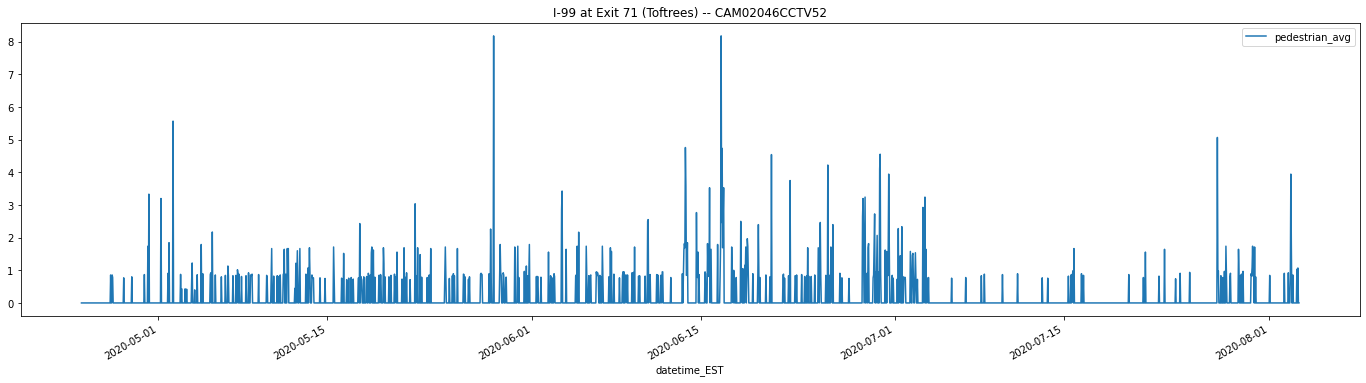

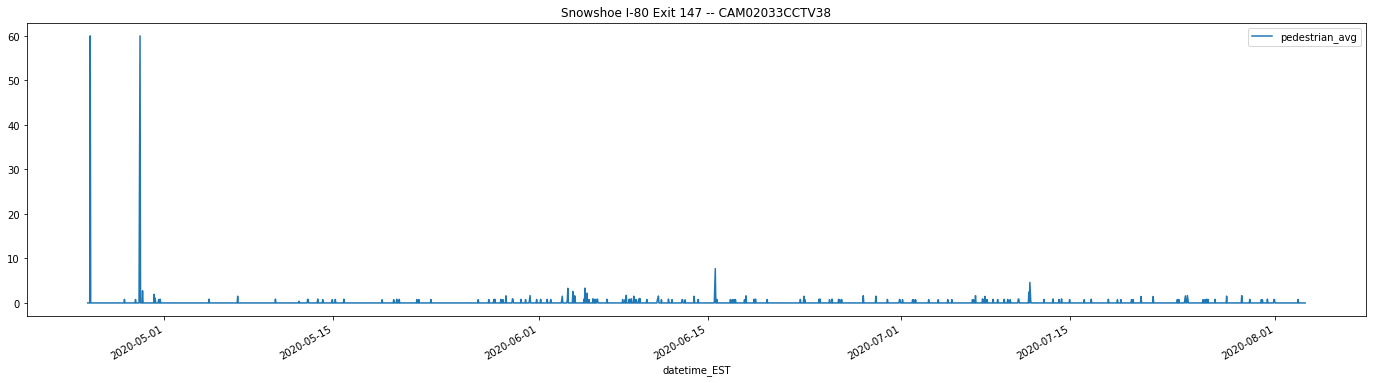

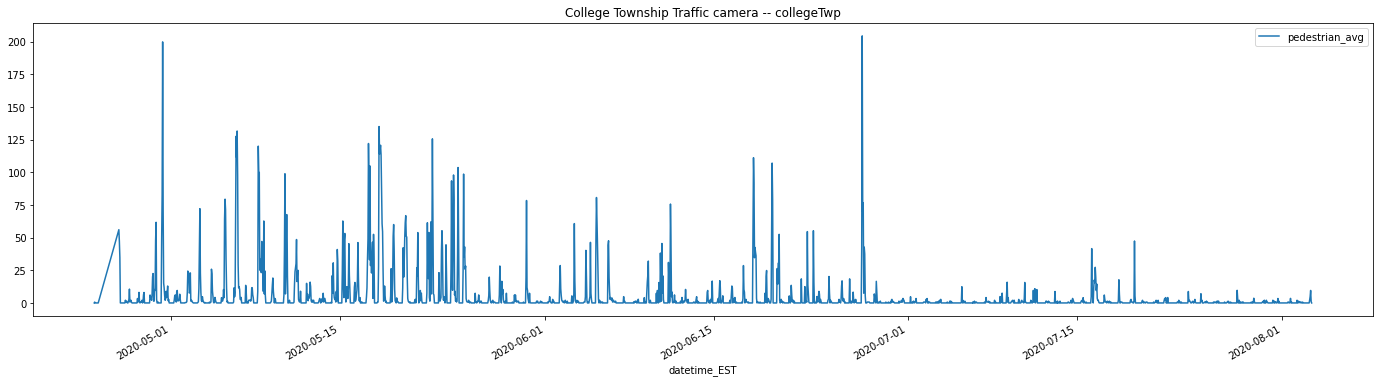

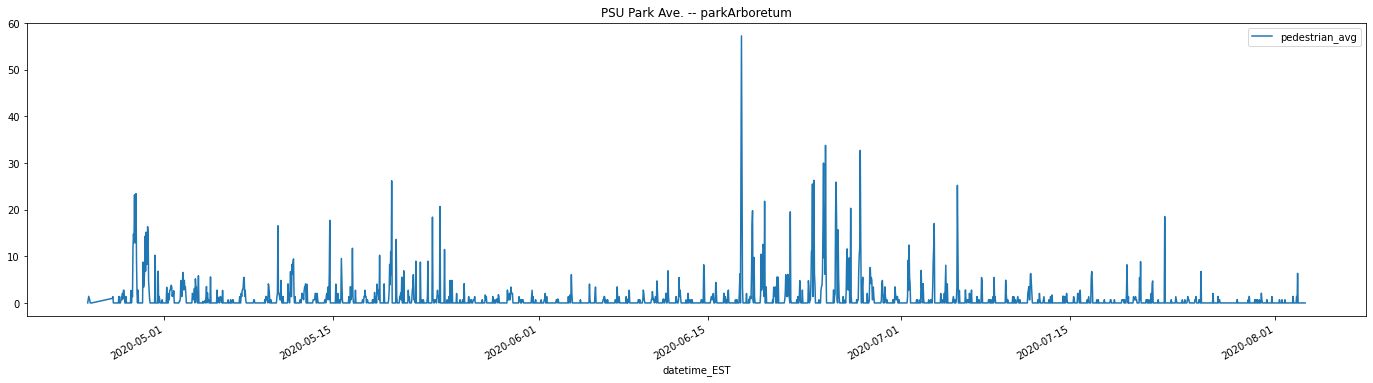

In [16]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [17]:
icdfcvc.to_csv("pedestrian_avg_per_hour_each_camera_427-803.csv",index=False)

In [18]:
xdf.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

In [19]:
df_sampledh

,datetime_EST,pedestrian_count
0,2020-04-24 16:00:00,3
1,2020-04-24 17:00:00,13
2,2020-04-24 18:00:00,14
3,2020-04-24 19:00:00,0
4,2020-04-24 20:00:00,6
...,...,...
2415,2020-08-03 07:00:00,46
2416,2020-08-03 08:00:00,40
2417,2020-08-03 09:00:00,36
2418,2020-08-03 10:00:00,12


In [20]:
icdfs.columns

Index(['datetime_EST', 'image_count_sum'], dtype='object')

In [21]:
#df_sampledh["image_count"] = icdfs['image_count_sum']
df_sampledh["image_count"] = icdfs['image_count_sum']

In [22]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.pedestrian_count) / (float(row.image_count)/(19.0 * 60.0)))
    return rv   

df_sampledh['pedestrian_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

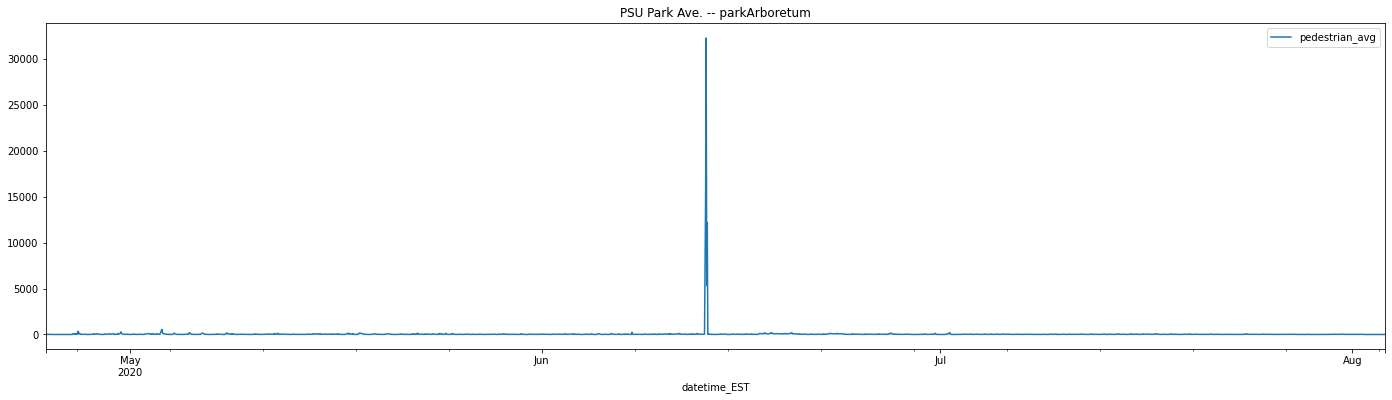

In [23]:
ax = df_sampledh.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [24]:
df_sampledh.to_csv("pedestrian_avg_per_hour_all_cameras_427-803.csv",index=False)

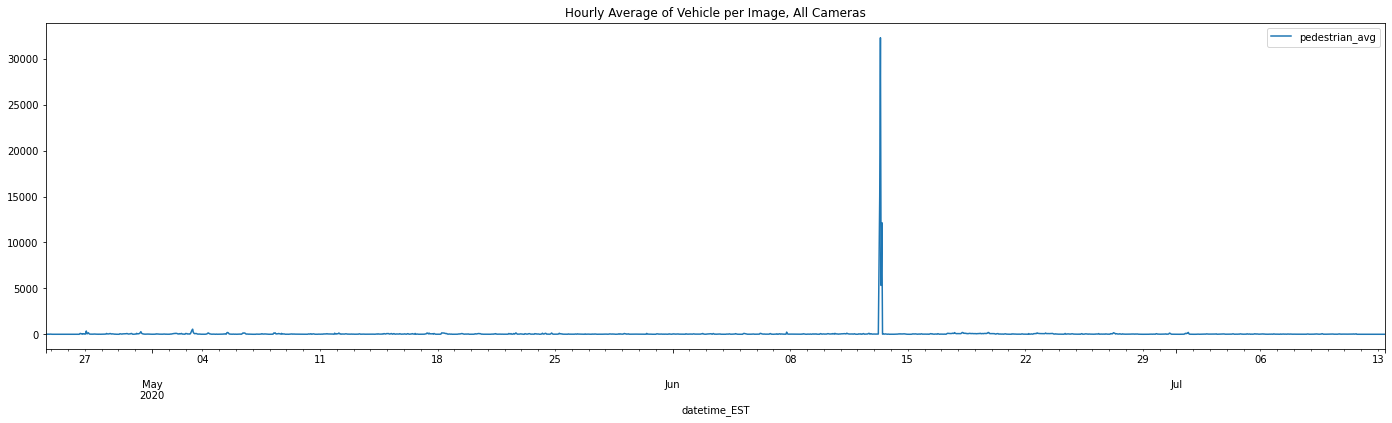

In [24]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title="Hourly Average of Vehicle per Image, All Cameras")

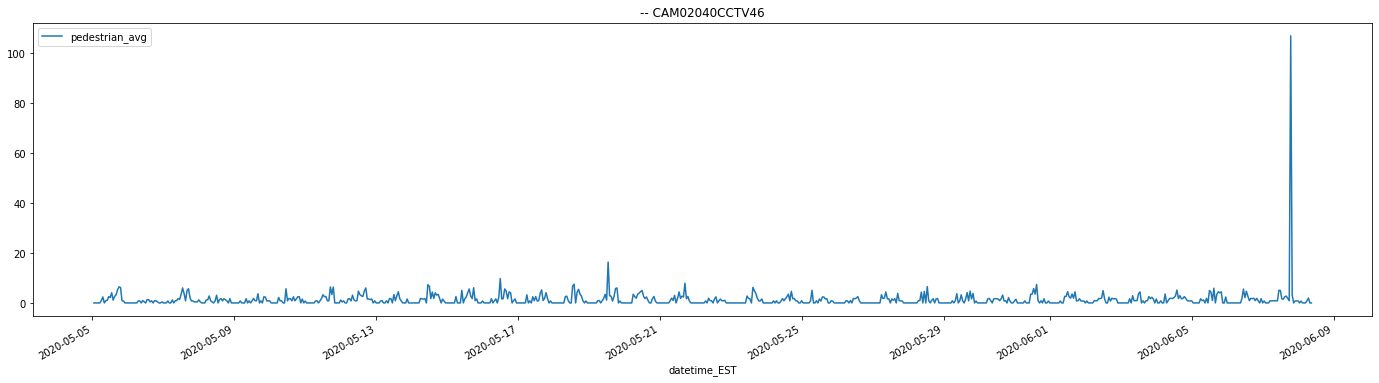

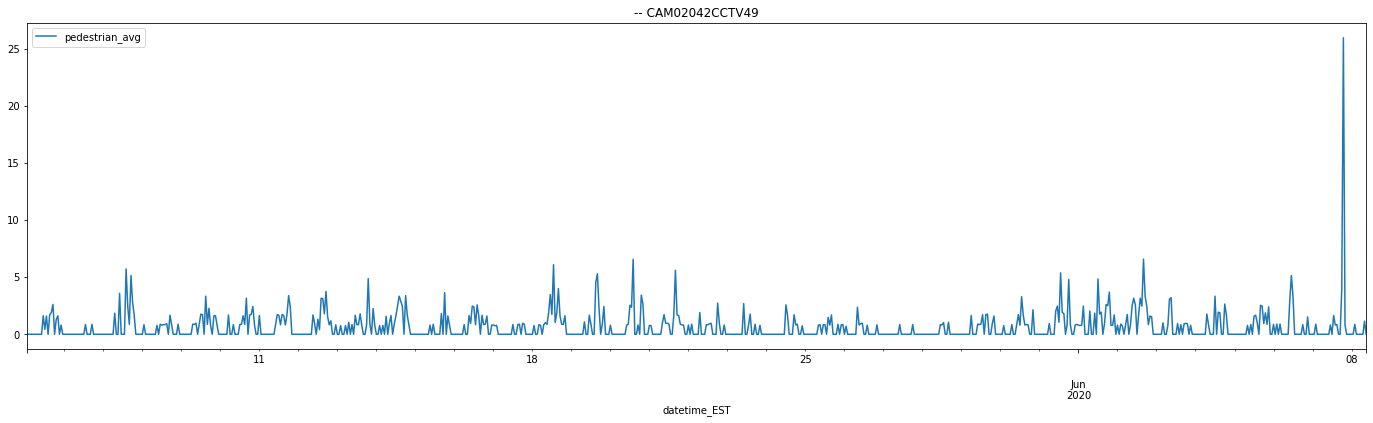

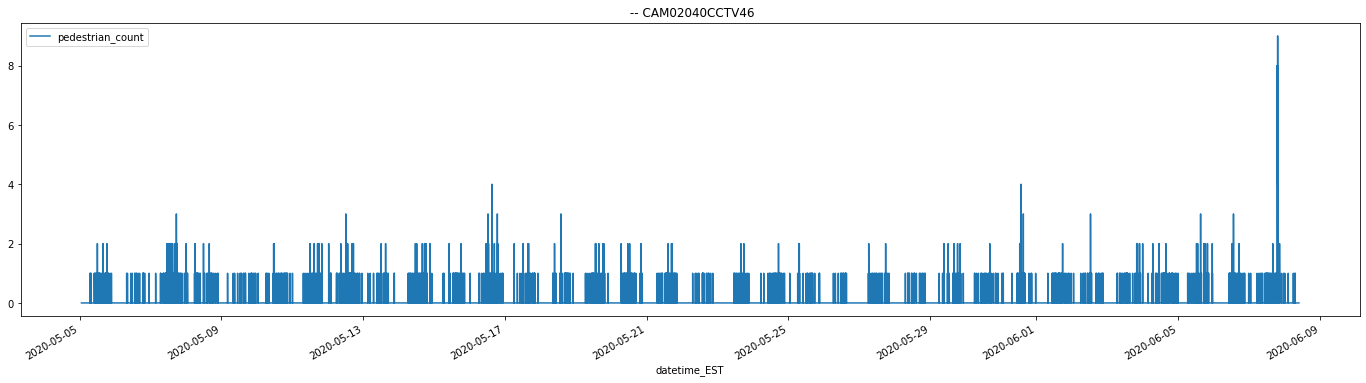

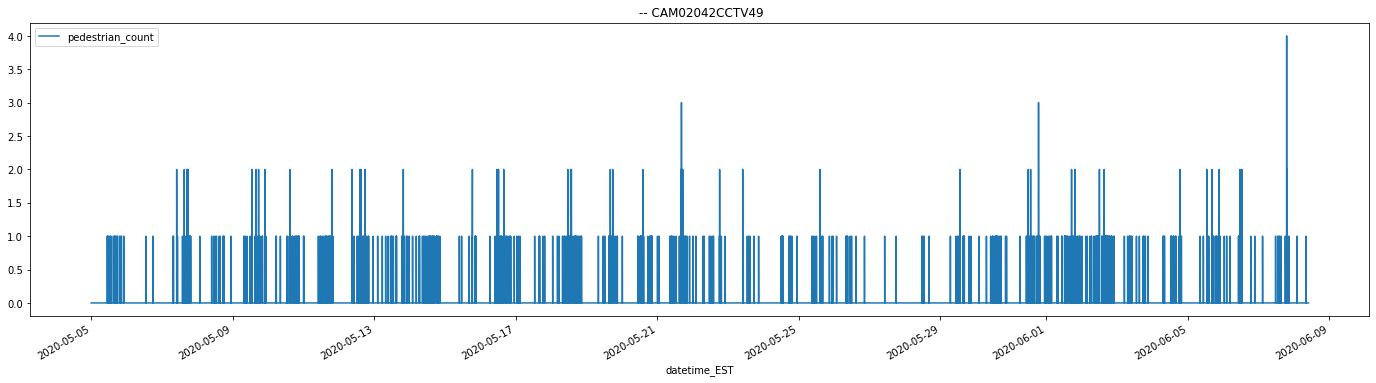

In [64]:
camerasx =["CAM02040CCTV46","CAM02042CCTV49"]
for cn in camerasx:
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    fdf_twp = fdf_twp[(fdf_twp['datetime_EST'] > '2020-5-5')]
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_avg', kind = 'line',figsize=(24,6),title=f"-- {cn}")

for cn in camerasx:
    fdf_twp = xdf[xdf['camera_name'].str.contains(cn)].copy()
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    fdf_twp = fdf_twp[(fdf_twp['datetime_EST'] > '2020-5-5')]
    ax = fdf_twp.plot(x ='datetime_EST', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f" -- {cn}")

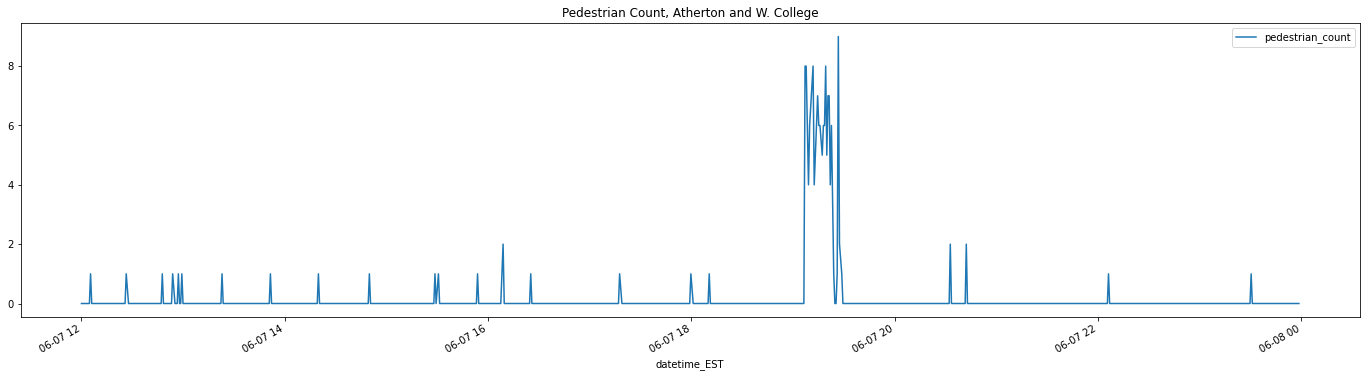

In [13]:
k = xdf[xdf['camera_name'].str.contains("CCTV46")].copy()
    
k['datetime_EST'] = pd.to_datetime(k['datetime_EST'])
k.sort_values(by='datetime_EST')
wk = k[(k['datetime_EST'] > '2020-6-7 12:00:00') & (k['datetime_EST'] <= '2020-6-8 0:00:00')]
ax = wk.plot(x ='datetime_EST', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"Pedestrian Count, Atherton and W. College")

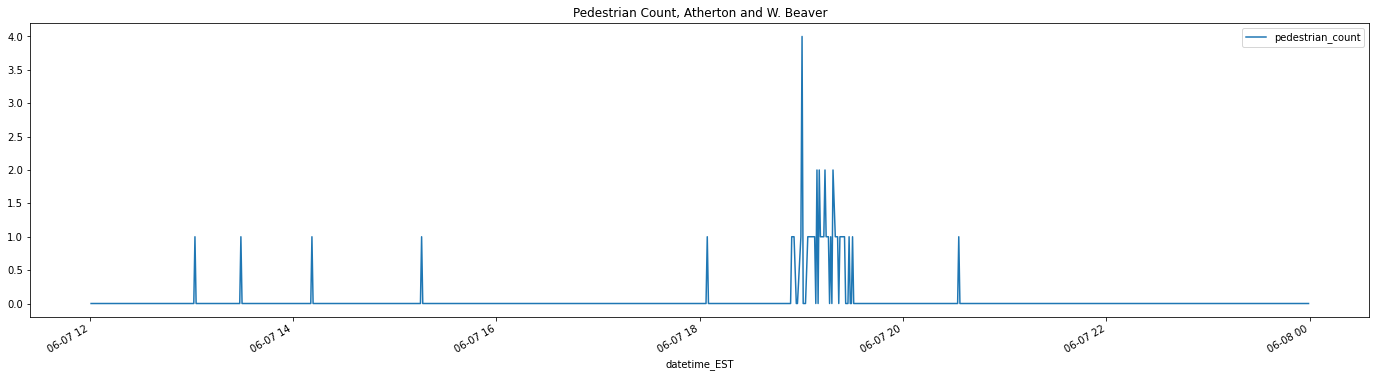

In [14]:
k = xdf[xdf['camera_name'].str.contains("CCTV49")].copy()
    
k['datetime_EST'] = pd.to_datetime(k['datetime_EST'])
k.sort_values(by='datetime_EST')
wk = k[(k['datetime_EST'] > '2020-6-7 12:00:00') & (k['datetime_EST'] <= '2020-6-8 0:00:00')]
ax = wk.plot(x ='datetime_EST', y='pedestrian_count', kind = 'line',figsize=(24,6),title=f"Pedestrian Count, Atherton and W. Beaver")

In [23]:
from platform import python_version
import tensorflow
import keras
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

14


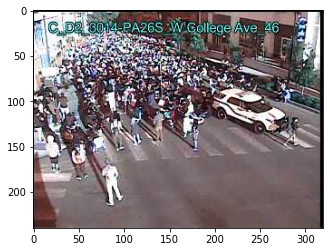

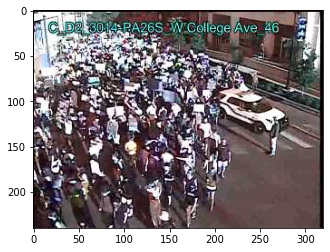

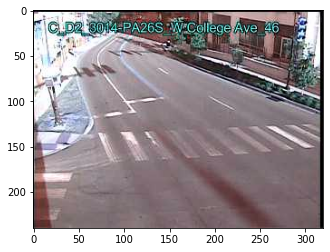

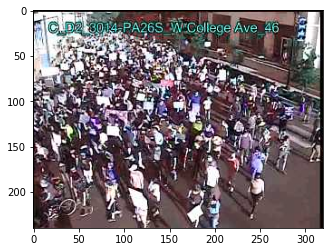

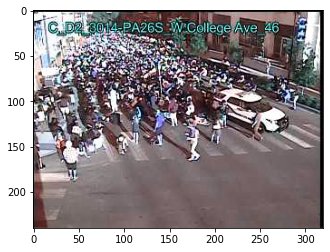

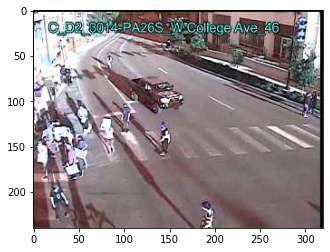

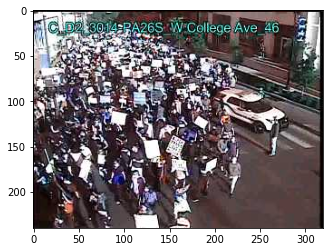

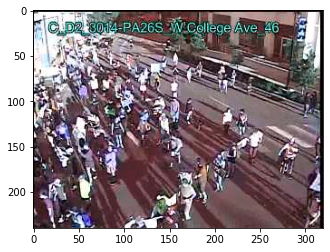

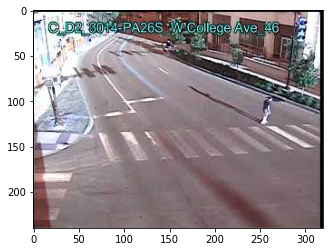

In [40]:
days = [
    "20200607_232"
]

cn = "CAM02040CCTV46"
os.chdir("/home/ubuntu/nitelite/cams8/")
for d in days:
    #print(cn,d)
    nf = glob.glob(f"/home/ubuntu/nitelite/cams8/{d}*{cn}.jpg")
    print(len(nf))
    x = 0
    for x in range(0,len(nf)):
        mnf = nf[x]
        #print(mnf)
        if (os.stat(nf[x]).st_size > 9000):
            x += 1
            try:
                im = cv2.imread(nf[x])
                plt.imshow(im)
                plt.show()
            except:
                print("")